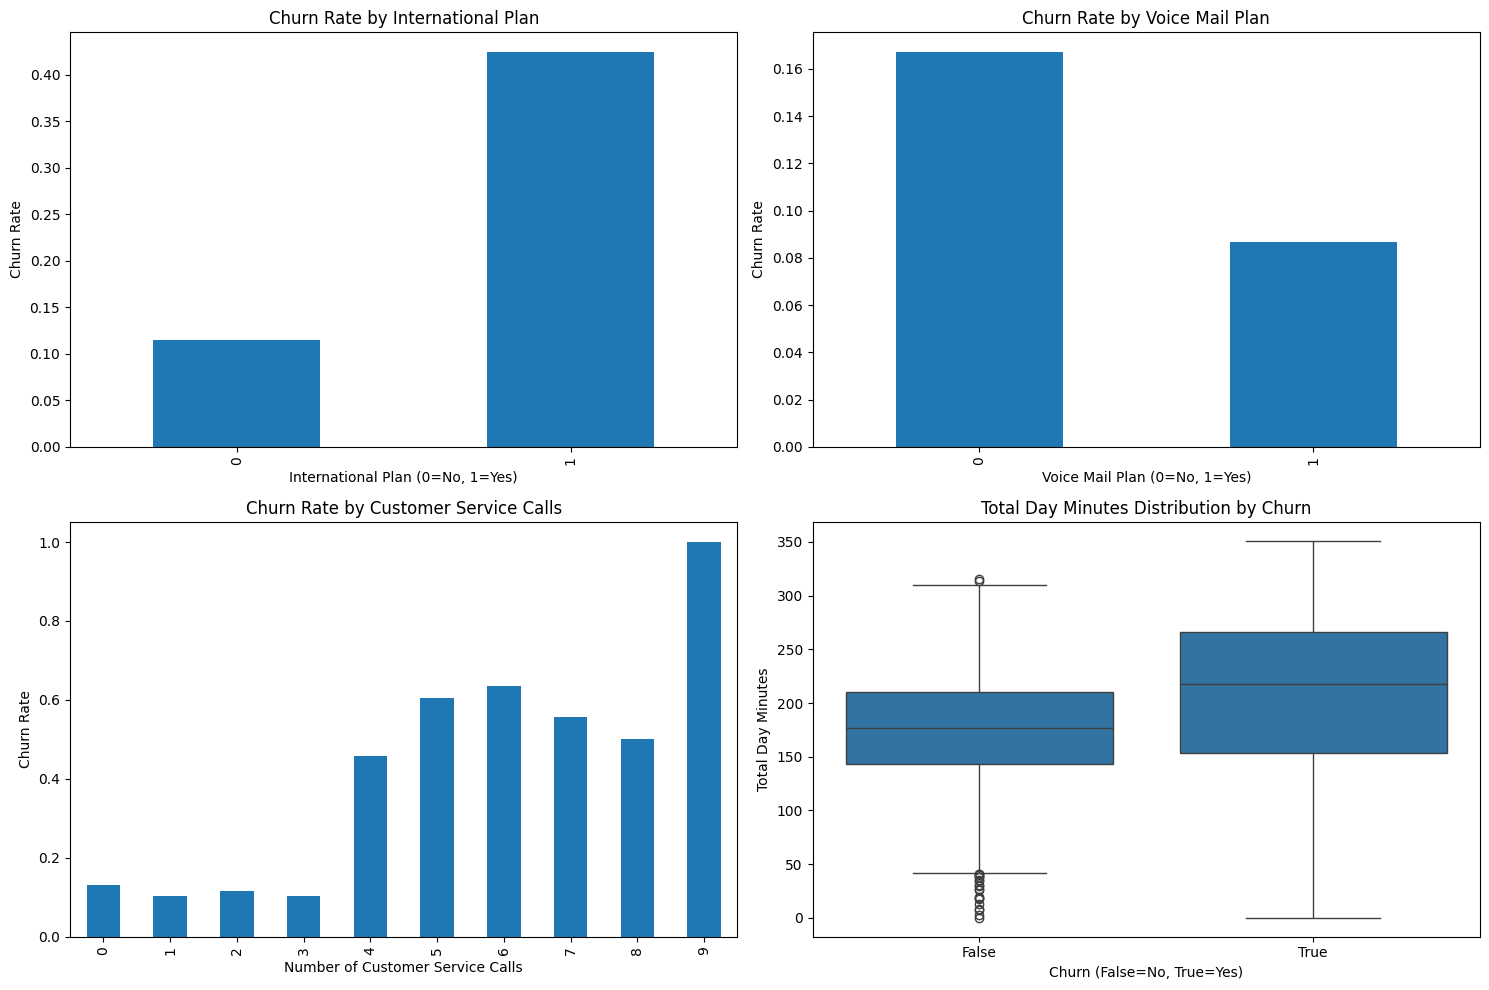


Model Evaluation Results:
Accuracy: 0.940

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.97       566
        True       0.91      0.67      0.77       101

    accuracy                           0.94       667
   macro avg       0.93      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



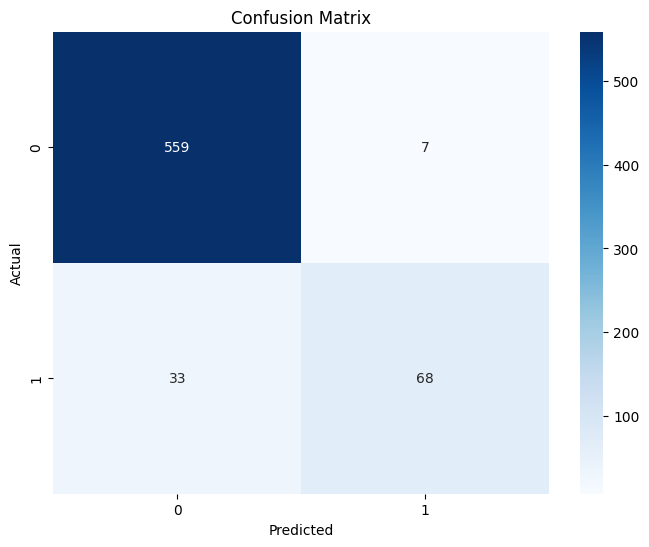

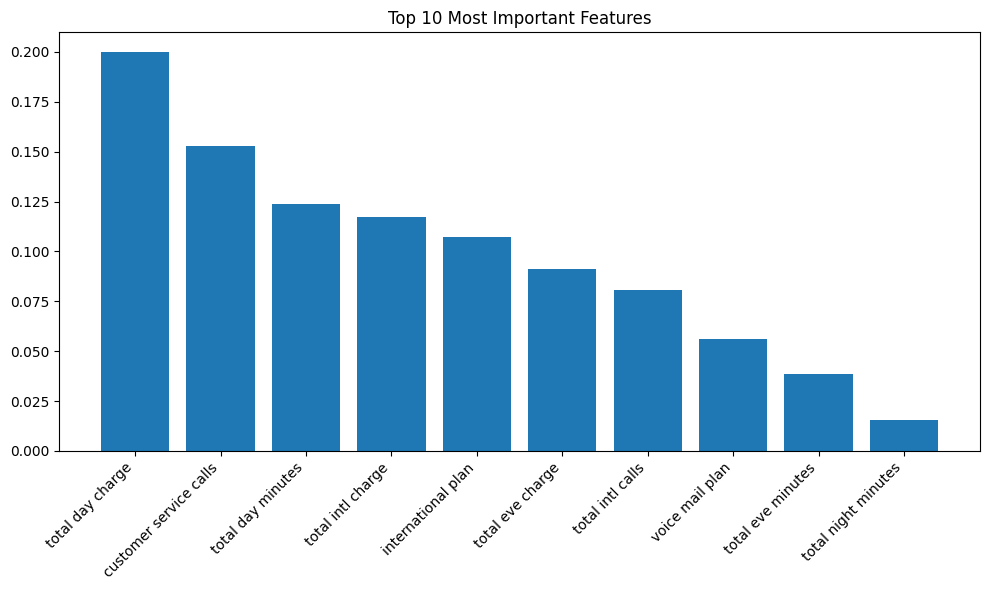

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/Telecom Churn Dataset (ID-35) .csv')

# Step 1: Categorical Feature Encoding
# Binary encoding for yes/no features
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# One-hot encoding for state and area code
df = pd.get_dummies(df, columns=['state', 'area code'])

# Step 2: Handle Missing Values with Mode Imputation
for column in df.columns:
    if df[column].isnull().any():
        df[column] = df[column].fillna(df[column].mode()[0])

# Step 3: Visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Churn Rate by International Plan
plt.subplot(2, 2, 1)
churn_by_international = df.groupby('international plan')['churn'].mean()
churn_by_international.plot(kind='bar')
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan (0=No, 1=Yes)')
plt.ylabel('Churn Rate')

# Plot 2: Churn Rate by Voice Mail Plan
plt.subplot(2, 2, 2)
churn_by_voicemail = df.groupby('voice mail plan')['churn'].mean()
churn_by_voicemail.plot(kind='bar')
plt.title('Churn Rate by Voice Mail Plan')
plt.xlabel('Voice Mail Plan (0=No, 1=Yes)')
plt.ylabel('Churn Rate')

# Plot 3: Churn Rate by Customer Service Calls
plt.subplot(2, 2, 3)
churn_by_service_calls = df.groupby('customer service calls')['churn'].mean()
churn_by_service_calls.plot(kind='bar')
plt.title('Churn Rate by Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')

# Plot 4: Total Day Minutes Distribution by Churn
plt.subplot(2, 2, 4)
sns.boxplot(x='churn', y='total day minutes', data=df)
plt.title('Total Day Minutes Distribution by Churn')
plt.xlabel('Churn (False=No, True=Yes)')
plt.ylabel('Total Day Minutes')

plt.tight_layout()
plt.show()

# Step 4: Prepare Data for Modeling
# Remove target variable and non-predictive features
X = df.drop(['churn', 'phone number'], axis=1)
y = df['churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Decision Tree Model
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

# Train the model
dt_model.fit(X_train, y_train)

# Step 6: Model Evaluation
# Make predictions
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation Results:")
print(f"Accuracy: {accuracy:.3f}")

# Generate detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()